In [1]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import product

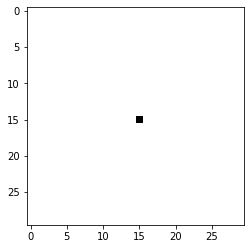

In [2]:
M = 30
N = 10
stickiness = 0.2
mat = np.zeros((M,M))
mat[ M//2 , M//2 ] = 1

plt.imshow(mat , cmap = "binary")



In [3]:
def spawnRandomParticle(M):
    n = np.random.randint(0,4*M-4)
    if n//((M-1)*2) == 0:
        i,j = (0,n%(M-1)) if (n%((M-1)*2))//(M-1) == 0 else (M-1,M-1-n%(M-1))
    elif n//((M-1)*2) == 1 :
        i,j =  (M-1-n%(M-1),0) if (n%((M-1)*2))//(M-1) == 0 else (n%(M-1), M-1)
    return (i,j)

def simulate_dla(M,N,stickiness):
    
    mat = np.zeros((M,M))
    mat[ M//2 , M//2 ] = 1

    nParticles = 0
    while(nParticles < N):

        i,j = spawnRandomParticle(M)
        if (mat[i,j]==1): # if point spawned on occuped cell
            continue

        nParticles += 1
        stick = False

        while(not stick): # random walk
            neighbours = [p for p in list(product([(i-1)%(M-1),i,(i+1)%(M-1)], [(j-1)%(M-1),j,(j+1)%(M-1)])) if p != (i,j)]
            for point in  neighbours: # check if stick
                if mat[point] == 1 :
                    if np.random.uniform(0,1) < stickiness :
                        mat[i,j] = 1
                        stick = True
                        break
                    else :
                        break

            if not stick : # if not stick move to random neighbour that is not occupied
                unoccupied = [ k for k in neighbours if mat[k]!=1]
                i,j = unoccupied[np.random.choice(len( unoccupied  ))]
        
    return mat



    

In [8]:

M= 25
N = 100
stickies = [0.05,0.2,0.5,1]
np.random.seed(seed=1)
mat_by_stick = {}
for stickiness in stickies:
    mat = np.zeros((M,M))
    for i in range(100):
        mat = mat + simulate_dla(M,N,stickiness)
        if i%20 == 0: 
            print(f"{i} % done for stickiness {stickiness}")
    mat = mat /1000
    mat_by_stick[stickiness] = mat
    


0 % done for stickiness 0.05
20 % done for stickiness 0.05
40 % done for stickiness 0.05
60 % done for stickiness 0.05
80 % done for stickiness 0.05
0 % done for stickiness 0.2
20 % done for stickiness 0.2
40 % done for stickiness 0.2
60 % done for stickiness 0.2
80 % done for stickiness 0.2
0 % done for stickiness 0.5
20 % done for stickiness 0.5
40 % done for stickiness 0.5
60 % done for stickiness 0.5
80 % done for stickiness 0.5
0 % done for stickiness 1
20 % done for stickiness 1
40 % done for stickiness 1
60 % done for stickiness 1
80 % done for stickiness 1


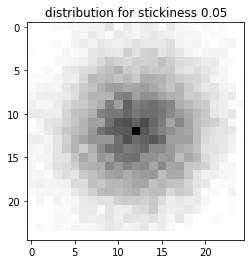

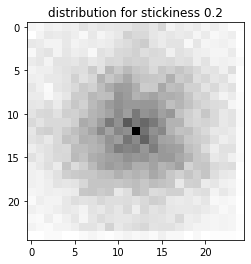

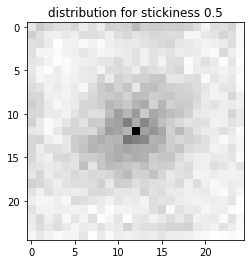

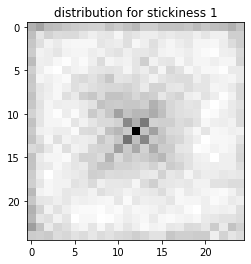

In [10]:
for stickiness in mat_by_stick.keys():
    plt.figure()
    plt.imshow(mat_by_stick[stickiness] , cmap = "binary")
    plt.title(f"distribution for stickiness {stickiness}")

Observations -
1. For low stickiness - the distribution of particles is denser and more centred around the centre particle. Nee a measure this. A few simple metrics that can be used to quatify this-

- Average distance of all points from centre(average/median)
- Average distance of all points from their nearest n neighbours(for branching)
